Importing the Required Libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Smart_Bin.csv to Smart_Bin.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Smart_Bin.csv']))

Information overview of the dataset

In [ ]:
df.shape

(4638, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                4638 non-null   object 
 1   FL_B                 4636 non-null   float64
 2   FL_A                 4638 non-null   float64
 3   VS                   4631 non-null   float64
 4   FL_B_3               4636 non-null   float64
 5   FL_A_3               4632 non-null   float64
 6   FL_B_12              4633 non-null   float64
 7   FL_A_12              4638 non-null   float64
 8   Container Type       4638 non-null   object 
 9   Recyclable fraction  4638 non-null   object 
dtypes: float64(7), object(3)
memory usage: 362.5+ KB


Replacing the missing values

In [ ]:
def removing_missing_values(column_name):
    df[column_name] = df[column_name].fillna(df[column_name].median())

In [ ]:
i=1
for i in range(1,8):
    removing_missing_values(df.columns[i])
    i+=1
df

,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
0,Emptying,85.3,34.4,6.0,75.9,54.7,83.3,39.8,Silvertop-a,Mixed
1,Emptying,96.2,51.7,8.0,83.3,33.9,85.0,57.4,BIM-3 FTI bottentomd,Non Recyclable
2,Non Emptying,50.9,63.5,5.0,30.8,55.7,51.7,68.5,BIM-3 FTI bottentomd,Recyclable
3,Emptying,83.1,33.9,6.0,91.8,61.1,84.6,43.6,Lindstrom-a,Mixed
4,Non Emptying,73.5,32.2,3.0,68.0,30.5,62.4,53.0,Lindstrom-a,Non Recyclable
...,...,...,...,...,...,...,...,...,...,...
4633,Emptying,51.9,32.0,4.0,59.3,30.8,53.6,33.2,Silvertop-a,Mixed
4634,Non Emptying,62.7,22.7,8.0,68.1,35.5,68.9,31.4,Rectangular,Recyclable
4635,Emptying,53.9,30.2,4.0,52.5,32.5,53.7,34.7,Cubic,Mixed
4636,Non Emptying,84.8,41.2,7.0,81.4,50.4,83.0,40.6,Rectangular,Recyclable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                4638 non-null   object 
 1   FL_B                 4638 non-null   float64
 2   FL_A                 4638 non-null   float64
 3   VS                   4638 non-null   float64
 4   FL_B_3               4638 non-null   float64
 5   FL_A_3               4638 non-null   float64
 6   FL_B_12              4638 non-null   float64
 7   FL_A_12              4638 non-null   float64
 8   Container Type       4638 non-null   object 
 9   Recyclable fraction  4638 non-null   object 
dtypes: float64(7), object(3)
memory usage: 362.5+ KB


Label Encoding the Target variable

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()

array([0, 1])

In [ ]:
df['Container Type']= label_encoder.fit_transform(df['Container Type'])
df['Container Type'].unique()

array([12,  1,  7, 11,  8,  2,  0,  3,  5,  9, 13,  6, 10,  4])

In [ ]:
df['Recyclable fraction']= label_encoder.fit_transform(df['Recyclable fraction'])
df['Recyclable fraction'].unique()

array([0, 1, 2])

In [ ]:
df.head()

,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
0,0,85.3,34.4,6.0,75.9,54.7,83.3,39.8,12,0
1,0,96.2,51.7,8.0,83.3,33.9,85.0,57.4,1,1
2,1,50.9,63.5,5.0,30.8,55.7,51.7,68.5,1,2
3,0,83.1,33.9,6.0,91.8,61.1,84.6,43.6,7,0
4,1,73.5,32.2,3.0,68.0,30.5,62.4,53.0,7,1


In [ ]:
#df.describe()

Detecting and Removing the Outliers


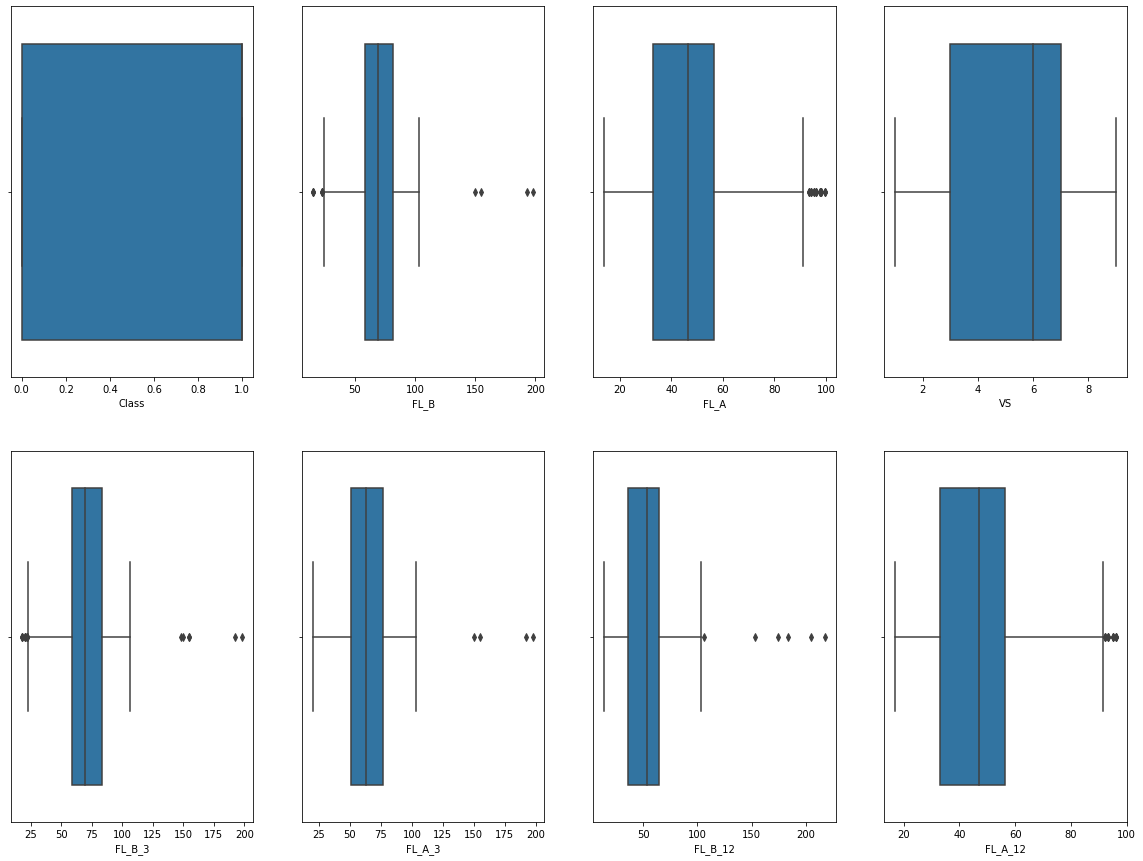

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(df['Class'])
plt.subplot(2,4,2)
sns.boxplot(df['FL_B'])
plt.subplot(2,4,3)
sns.boxplot(df['FL_A'])
plt.subplot(2,4,4)
sns.boxplot(df['VS'])
plt.subplot(2,4,5)
sns.boxplot(df['FL_B_3'])
plt.subplot(2,4,6)
sns.boxplot(df['FL_A_3'])
plt.subplot(2,4,7)
sns.boxplot(df['FL_B_12'])
plt.subplot(2,4,8)
sns.boxplot(df['FL_A_12'])
plt.show()

Removing the Outliers

In [ ]:
df['FL_B'].values[df['FL_B'].values > 100] = df['FL_B'].mean()
df['FL_B_3'].values[df['FL_B_3'].values > 100] = df['FL_B_3'].mean()
df['FL_B_12'].values[df['FL_B_12'].values > 100] = df['FL_B_12'].mean()
df['FL_A'].values[df['FL_A'].values > 100] = df['FL_A'].mean()
df['FL_A_3'].values[df['FL_A_3'].values > 100] = df['FL_A_3'].mean()
df['FL_A_12'].values[df['FL_A_12'].values > 100] = df['FL_A_12'].mean()

In [ ]:
df.describe()

,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
count,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000
mean,0.509702,68.521777,45.419685,5.117939,68.858020,62.044491,52.863154,45.483161,6.467658,1.001294
std,0.499960,17.805244,14.880283,2.446604,17.896963,20.051024,18.764462,14.759144,3.996835,0.812347
min,0.000000,15.300000,13.800000,1.000000,17.400000,20.000000,13.800000,16.900000,0.000000,0.000000
25%,0.000000,58.400000,32.900000,3.000000,58.800000,50.800000,36.400000,32.900000,3.000000,0.000000
50%,1.000000,69.400000,46.300000,6.000000,69.000000,62.600000,53.500000,47.200000,6.000000,1.000000
75%,1.000000,81.700000,56.400000,7.000000,82.900000,76.600000,64.300000,56.500000,10.000000,2.000000
max,1.000000,100.000000,99.500000,9.000000,100.000000,100.000000,100.000000,96.100000,13.000000,2.000000


Calculation of Change in Fill Level

In [ ]:
df['FL_C']=df['FL_A']-df['FL_B']
df['FL_C_3']=df['FL_A_3']-df['FL_B_3']
df['FL_C_12']=df['FL_A_12']-df['FL_B_12']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                4638 non-null   int64  
 1   FL_B                 4638 non-null   float64
 2   FL_A                 4638 non-null   float64
 3   VS                   4638 non-null   float64
 4   FL_B_3               4638 non-null   float64
 5   FL_A_3               4638 non-null   float64
 6   FL_B_12              4638 non-null   float64
 7   FL_A_12              4638 non-null   float64
 8   Container Type       4638 non-null   int64  
 9   Recyclable fraction  4638 non-null   int64  
 10  FL_C                 4638 non-null   float64
 11  FL_C_3               4638 non-null   float64
 12  FL_C_12              4638 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 471.2 KB


Corrleation Matrix

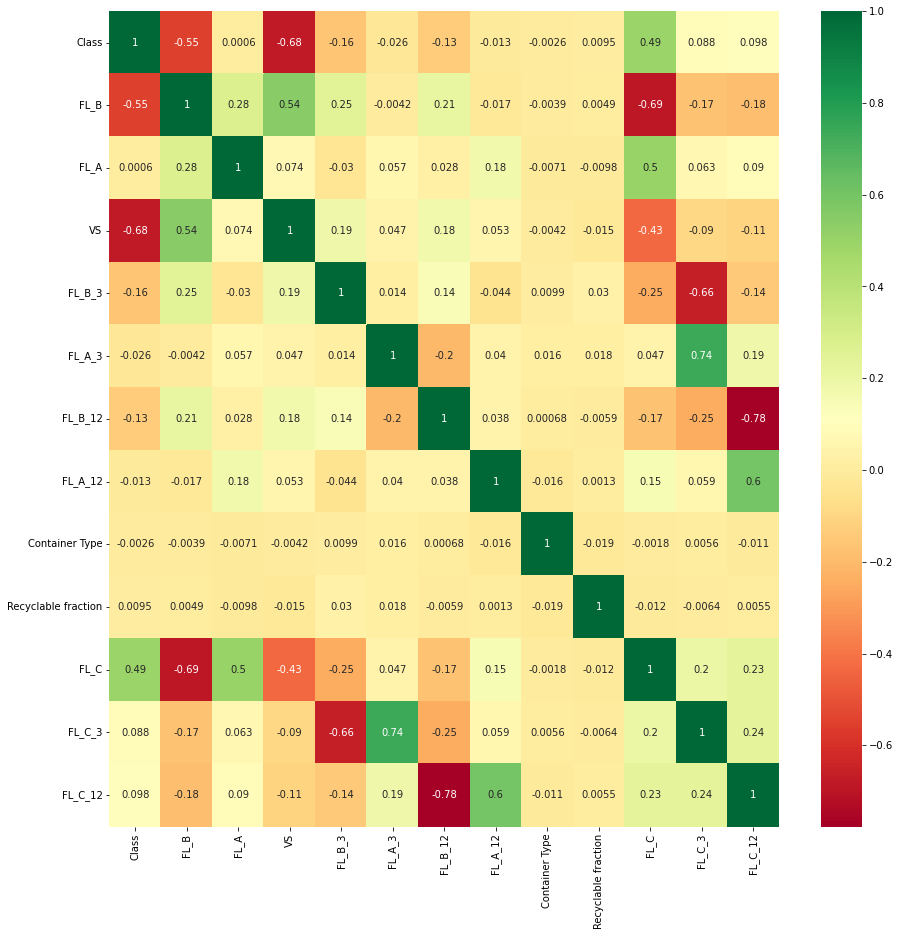

In [ ]:
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow

corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

Standard Scaling

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()

columns_to_scale=['FL_B','FL_A', 'FL_C', 'VS']
df[columns_to_scale]=standardScaler.fit_transform(df[columns_to_scale])
df.head()

,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction,FL_C,FL_C_3,FL_C_12
0,0,0.942421,-0.740636,0.360564,75.9,54.7,83.3,39.8,12,0,-1.404335,-21.2,-43.5
1,0,1.554666,0.422102,1.178111,83.3,33.9,85.0,57.4,1,1,-1.081010,-49.4,-27.6
2,1,-0.989803,1.215183,-0.048210,30.8,55.7,51.7,68.5,1,2,1.803650,24.9,16.8
3,0,0.818848,-0.774241,0.360564,91.8,61.1,84.6,43.6,7,0,-1.318452,-30.7,-41.0
4,1,0.279623,-0.888499,-0.865758,68.0,30.5,62.4,53.0,7,1,-0.919348,-37.5,-9.4


Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train_X = train[['FL_A', 'FL_C', 'VS']] 
train_y = train.Class

test_X = test[['FL_A', 'FL_C', 'VS']] 
test_y = test.Class 

K Nearest Neighbors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores=[]
for k in (range(1,21)):
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(train_X,train_y)
  knn_scores.append(knn_classifier.score(test_X,test_y))

Plotting the Graph of model scores for different k values

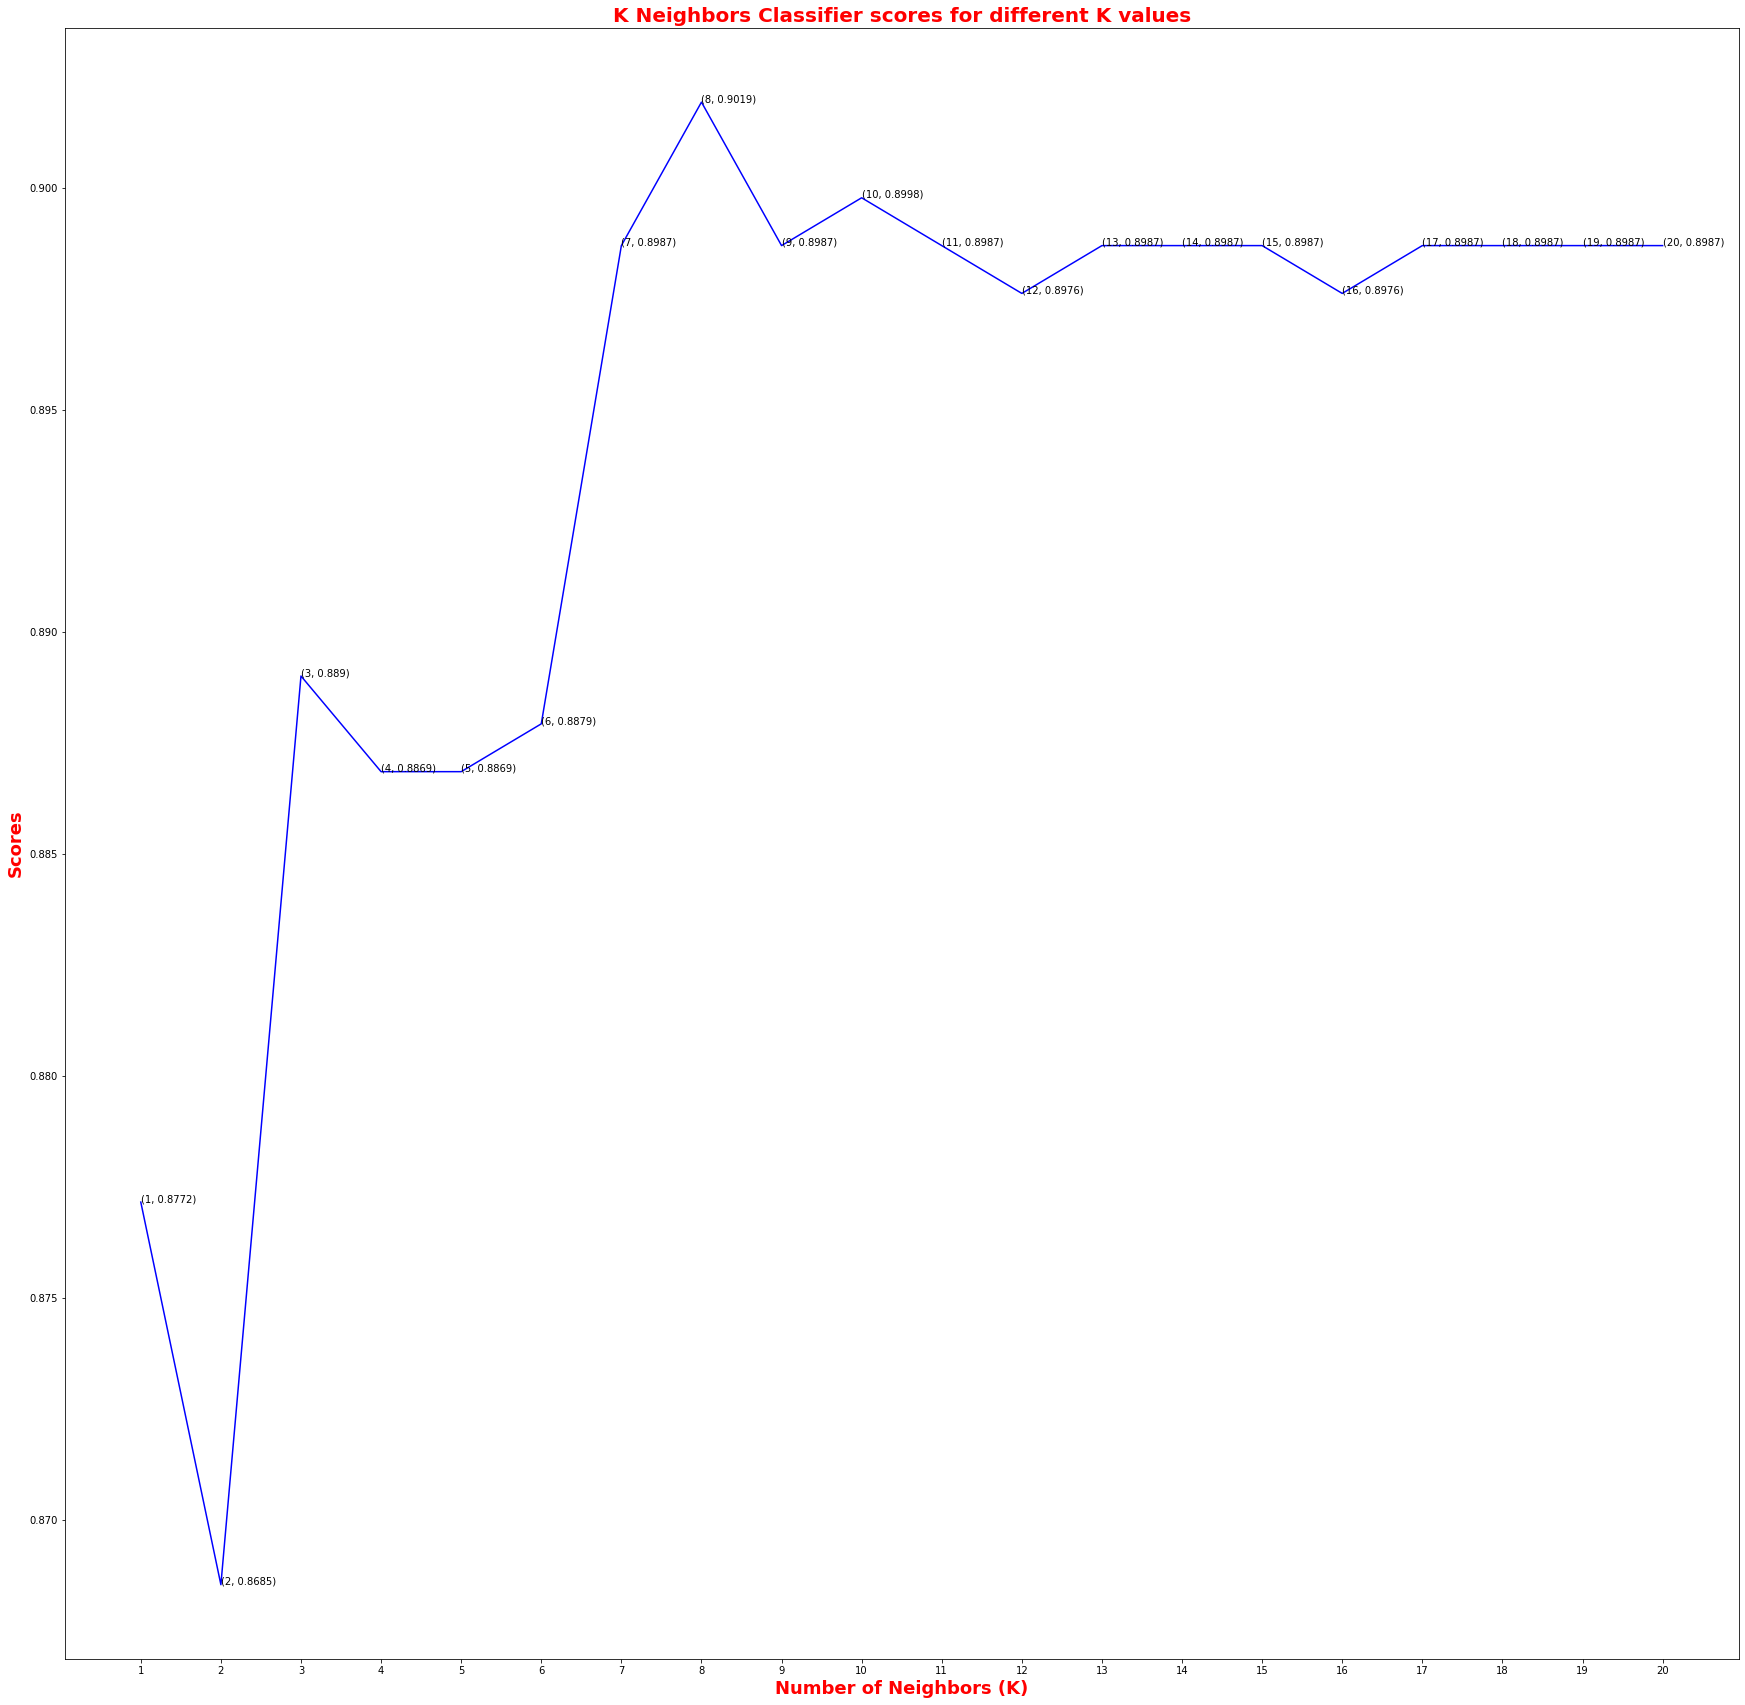

In [ ]:
plt.figure(figsize=(30,30))
plt.plot([k for k in range(1,21)],knn_scores,color="blue")
for i in range(1,21):
  plt.text(i, knn_scores[i-1],(i,round(knn_scores[i-1],4)))
plt.xticks([i for i in range(1,21)])
plt.xlabel("Number of Neighbors (K)",color="Red",weight="bold",fontsize="18")
plt.ylabel("Scores",color="Red",weight="bold",fontsize="18")
plt.title("K Neighbors Classifier scores for different K values",color="Red",weight="bold",fontsize="20")
#plt.figure(figsize=(30, 20))
plt.show()
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"

Plotting the confusion matrix 

[[407  41]
 [ 50 430]]




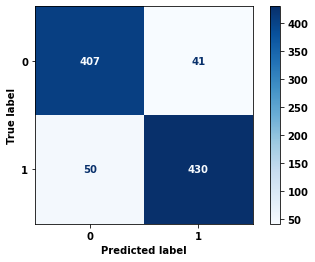

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

KN_model = KNeighborsClassifier(8)
KN_model.fit(train_X,train_y)
pred=KN_model.predict(test_X)
KN_model.score(test_X,test_y)
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(KN_model, test_X, test_y, cmap=plt.cm.Blues);

Classification Report

In [ ]:
#print(classification_report(test_y,pred))

TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_KNN = round(a/b,3 )
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC Score : ', MCC_KNN)

Accuracy  :  90.19396551724138
Precision :  91.29511677282377
Recall    :  89.58333333333334
F1 score  :  90.4311251314406
MCC Score :  0.804


In [ ]:
#sns.jointplot(x='FL_C',y='FL_A',data=df,hue='Class')

Support Vector Machine

[[397  51]
 [ 57 423]]




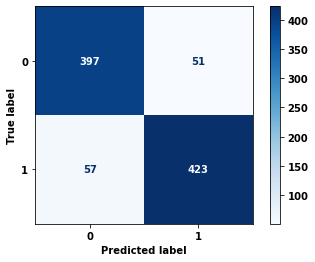

In [ ]:
from sklearn.svm import LinearSVC

svm_model=LinearSVC()
svm_model.fit(train_X,train_y)
pred=svm_model.predict(test_X)
svm_model.score(test_X,test_y)
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(svm_model, test_X, test_y, cmap=plt.cm.Blues);

In [ ]:
# print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_SVM = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score : ', MCC_SVM)

Accuracy  :  88.36206896551724
Precision :  89.24050632911393
Recall    :  88.125
F1 score  :  88.67924528301886
MCC score :  0.767


Logistic Regression

[[397  51]
 [ 55 425]]


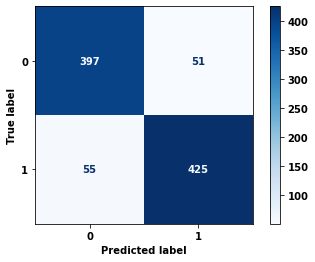

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)  
classifier.fit(train_X,train_y) 
y_pred= classifier.predict(test_X)
cm= confusion_matrix(test_y,y_pred) 
print(cm)
plot_confusion_matrix(classifier, test_X, test_y, cmap=plt.cm.Blues);

In [ ]:
#print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_SVM = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score : ', MCC_SVM)

Accuracy  :  88.57758620689656
Precision :  89.28571428571429
Recall    :  88.54166666666666
F1 score  :  88.91213389121339
MCC score :  0.771


Decision Tree

[[387  61]
 [ 63 417]]




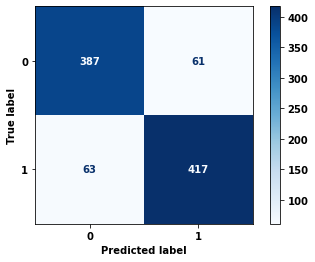

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_model=DecisionTreeClassifier()
clf_model.fit(train_X,train_y)
pred=clf_model.predict(test_X)
clf_model.score(test_X,test_y)
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(clf_model, test_X, test_y, cmap=plt.cm.Blues);
#print(classification_report(test_y,pred))

In [ ]:
#print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_DT = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score :', MCC_DT)

Accuracy  :  86.63793103448276
Precision :  87.23849372384937
Recall    :  86.875
F1 score  :  87.05636743215031
MCC score : 0.732


[[387  61]
 [ 63 417]]




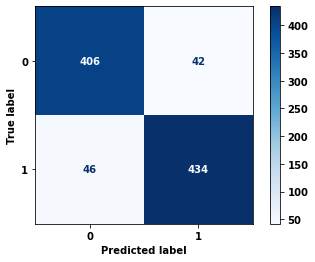

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(train_X, train_y)
y_pred = classifier.predict(test_X)
#clf_model.score(test_X,test_y)
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(classifier, test_X, test_y, cmap=plt.cm.Blues);

In [ ]:
#print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_NN = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score :', MCC_NN)

Accuracy  :  86.63793103448276
Precision :  87.23849372384937
Recall    :  86.875
F1 score  :  87.05636743215031
MCC score : 0.732


Random Forest

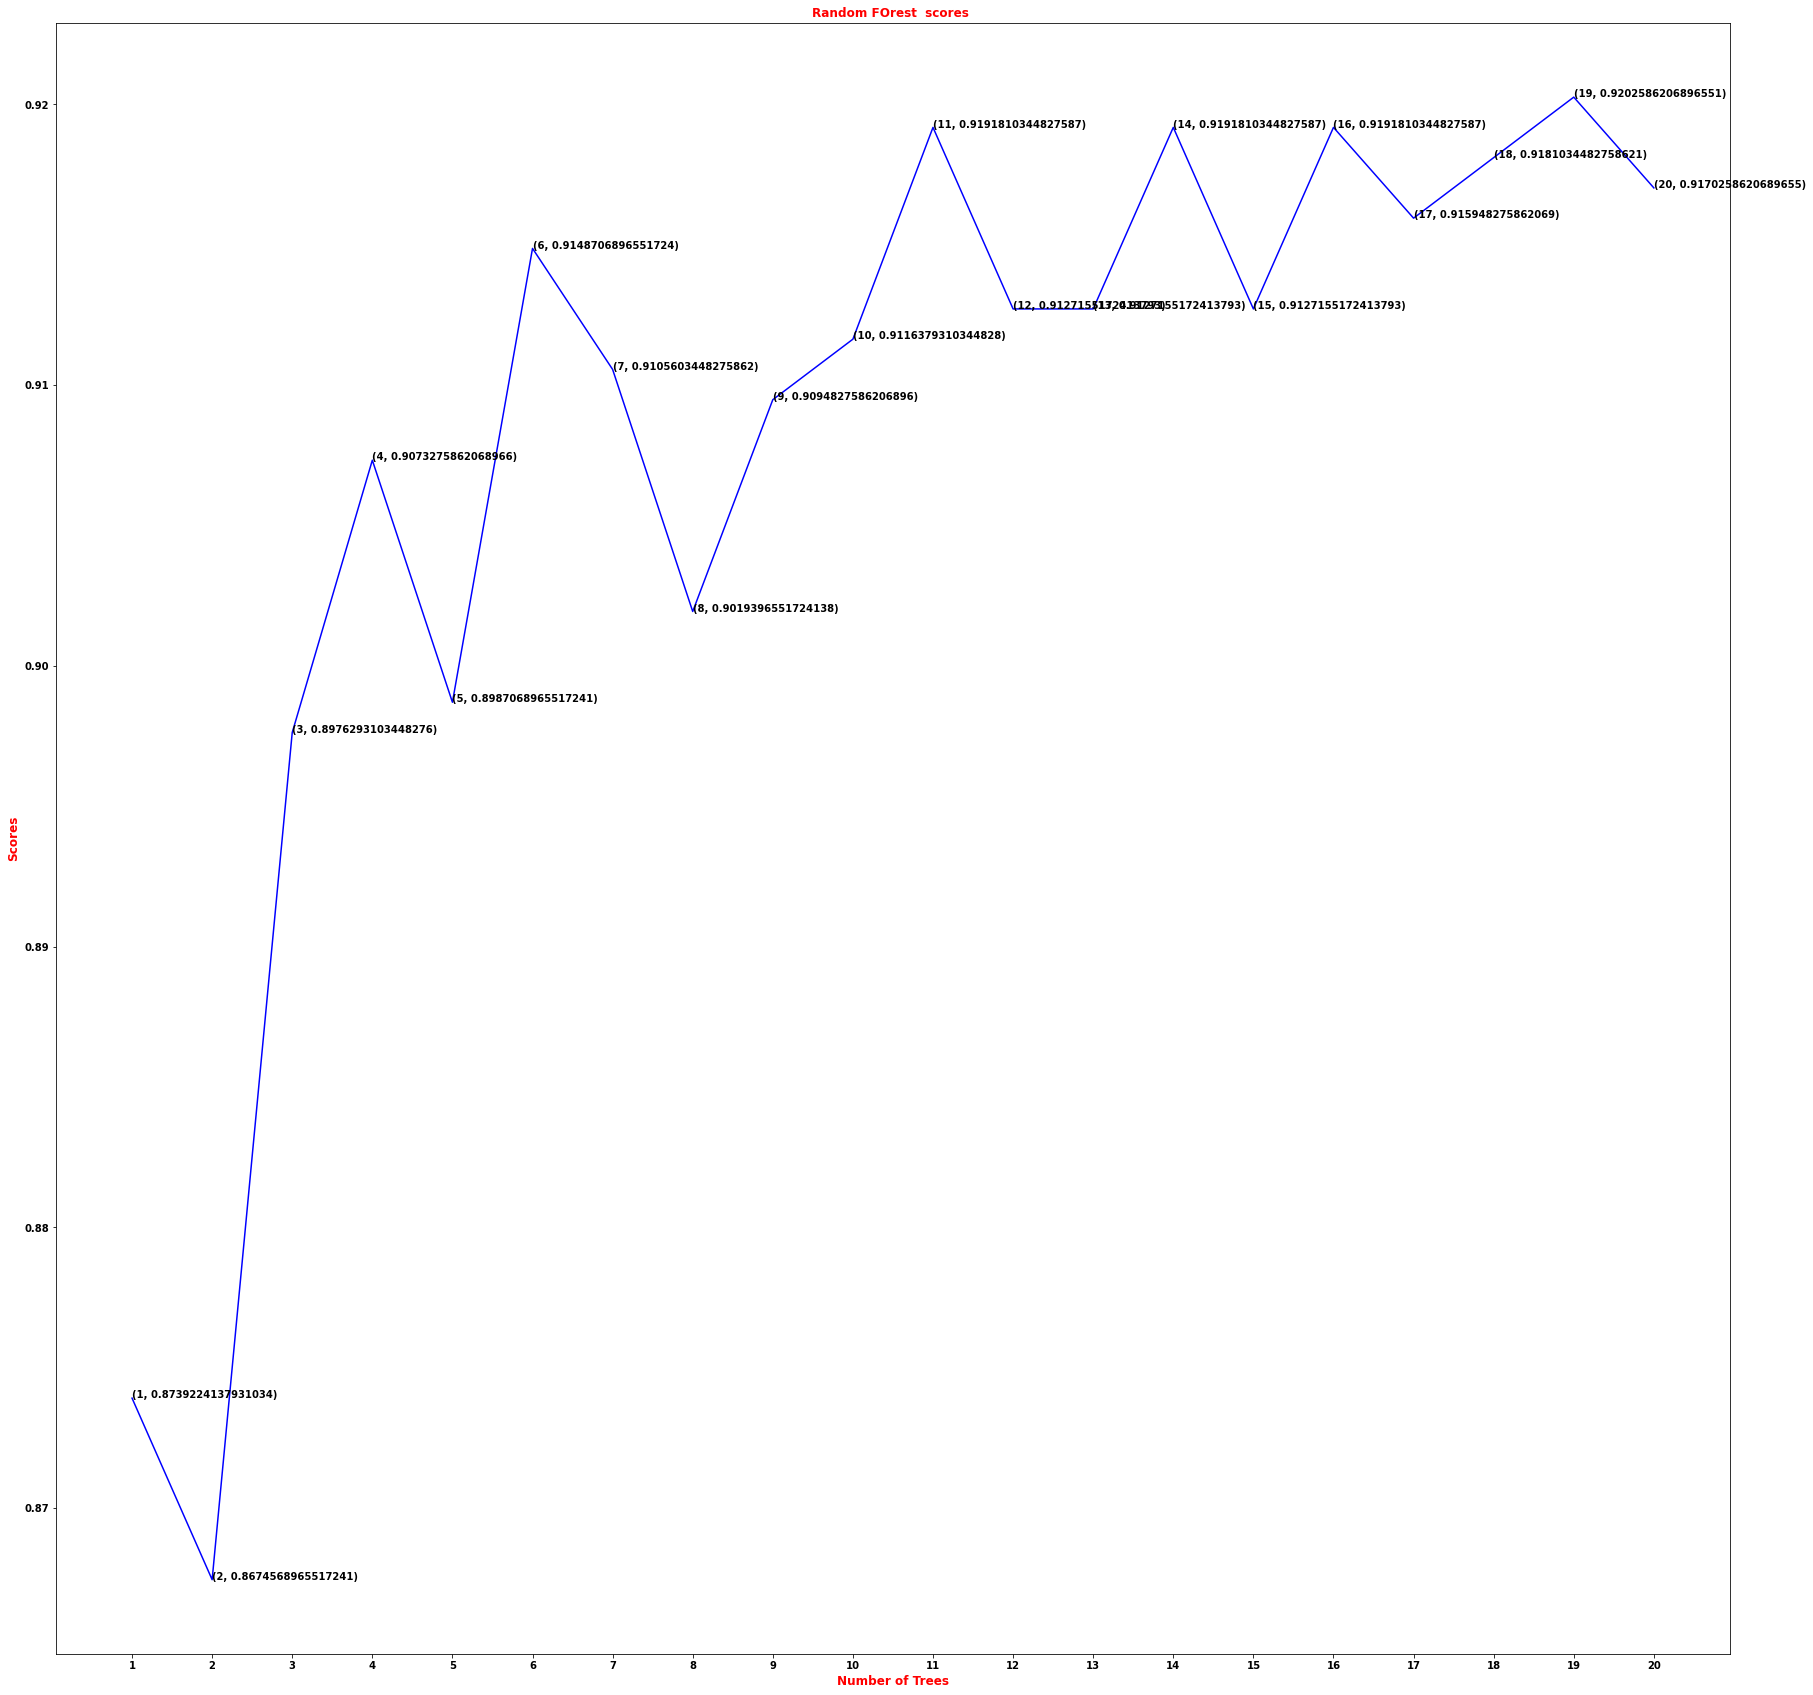

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_scores = []
for k in range(1,21):
    ensemble_classifier=RandomForestClassifier(n_estimators=k)
    ensemble_classifier.fit(train_X,train_y)
    RF_scores.append(ensemble_classifier.score(test_X,test_y))


plt.figure(figsize=(30,30))
plt.plot([k for k in range(1,21)],RF_scores,color='blue')
for i in range(1,21):
    plt.text(i, RF_scores[i-1], (i, RF_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Trees',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('Random FOrest  scores ',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]= "bold"

In [ ]:
#for k in range(1,99):
 # print(k,RF_scores[k])
 #
#  print('\n')
#regressor = RandomForestRegressor(n_estimators = 100, random_state = 0
#regressor.fit(x, y) 

[[420  28]
 [ 43 437]]




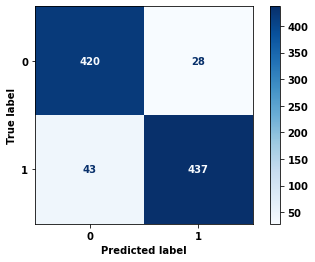

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(train_X,train_y)
pred = RF_model.predict(test_X)
RF_model.score(test_X,test_y)
#print(confusion_matrix(test_y,pred))
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(RF_model, test_X, test_y, cmap=plt.cm.Blues);
#print(classification_report(test_y,pred))

In [ ]:
#print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_RF = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score :', MCC_RF)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       448
           1       0.94      0.91      0.92       480

    accuracy                           0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928

Accuracy  :  92.34913793103449
Precision :  93.97849462365592
Recall    :  91.04166666666667
F1 score  :  92.4867724867725
MCC score : 0.847


In [ ]:
train, test = train_test_split(df, test_size=0.2)
train_X = train[['FL_B','FL_C','FL_C_12','FL_C_3']] 
train_y = train.Class

test_X = test[['FL_B','FL_C','FL_C_12','FL_C_3']] 
test_y = test.Class 

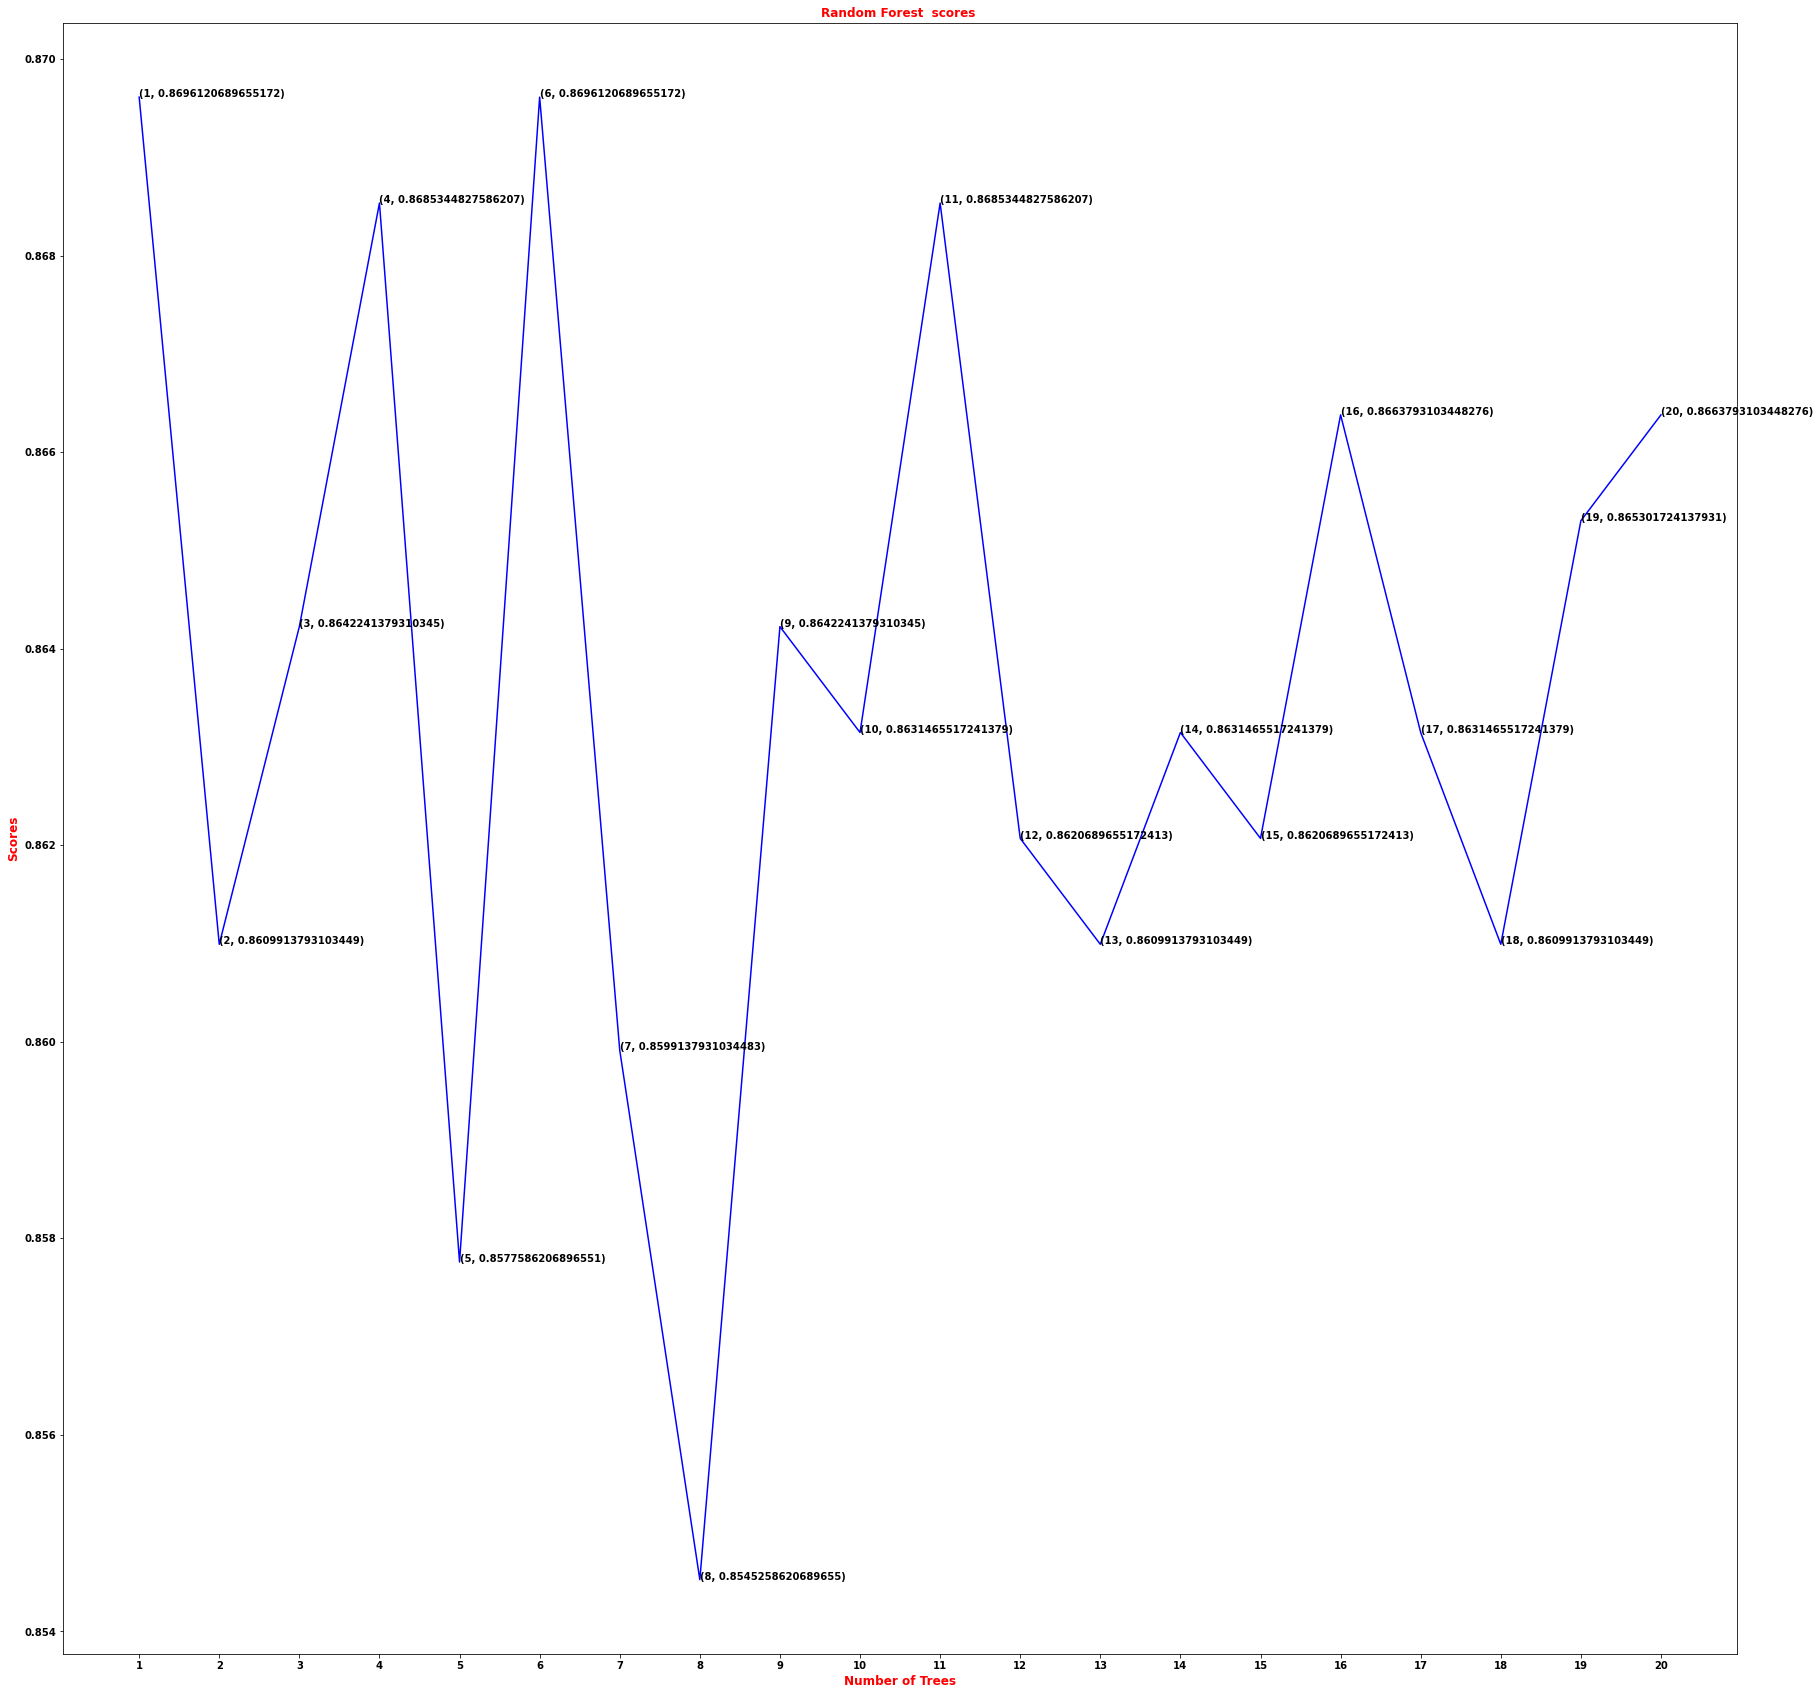

In [ ]:
RF_scores = []
for k in range(1,21):
    ensemble_classifier=RandomForestClassifier()
    ensemble_classifier.fit(train_X,train_y)
    RF_scores.append(ensemble_classifier.score(test_X,test_y))


plt.figure(figsize=(30,30))
plt.plot([k for k in range(1,21)],RF_scores,color='blue')
for i in range(1,21):
    plt.text(i, RF_scores[i-1], (i, RF_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Trees',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('Random Forest  scores ',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]= "bold"

[[410  63]
 [ 61 394]]




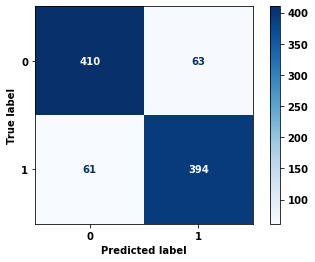

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(train_X,train_y)
pred = RF_model.predict(test_X)
RF_model.score(test_X,test_y)
#print(confusion_matrix(test_y,pred))
cm=confusion_matrix(test_y,pred)
print(cm)
print("\n")
plot_confusion_matrix(RF_model, test_X, test_y, cmap=plt.cm.Blues);
#print(classification_report(test_y,pred))

In [ ]:
print(classification_report(test_y,pred))
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_RF = round(a/b, 3)
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)
print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score :', MCC_RF)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       473
           1       0.86      0.87      0.86       455

    accuracy                           0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928

Accuracy  :  86.63793103448276
Precision :  86.2144420131291
Recall    :  86.5934065934066
F1 score  :  86.40350877192982
MCC score : 0.733
